## WHO API

In [1]:
import requests;

url     = "https://covid-19-coronavirus-statistics.p.rapidapi.com/v1/stats";
query   = {"country":"Mexico"};
headers = {
    'x-rapidapi-host': "covid-19-coronavirus-statistics.p.rapidapi.com",
    'x-rapidapi-key': "7e6cf1dbafmsha291e24ccb65407p1469b1jsn307b9be6aeef"
};

response = requests.request("GET", url, headers=headers, params=query);
print(response.text);

{"error":false,"statusCode":200,"message":"OK","data":{"lastChecked":"2020-04-04T15:06:19.477Z","covid19Stats":[{"city":"","province":"","country":"Mexico","lastUpdate":"2020-04-03 22:46:20","keyId":"Mexico","confirmed":1510,"deaths":50,"recovered":633}]}}


---
##### https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
---

## 'Our World in Data' data compilation
#### Sourced from the World Health Organization (WHO) Situation Reports
##### https://ourworldindata.org/coronavirus
##### https://ourworldindata.org/coronavirus-source-data; https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
##### https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports/

In [2]:
# PYTHON LIBRARIES
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from adjustText import adjust_text
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# CONSTANTS
markerSymbol = [
    "o", #circle
    "v", #triangle_down
    "^", #triangle_up
    "<", #triangle_left
    ">", #triangle_right
    "s", #square
    "p", #pentagon
    "P", #plus (filled)
    "*", #star
    "H", #hexagon2
    "X", #x (filled)
    "D", #diamond
    "d", #thin_diamond
    "1", #tri_down
    "2", #tri_up
    "3", #tri_left
    "4", #tri_right
    "+", #plus
    "x"  #x
];

markerColour = [
    '#f44336', #red
    '#e91e63', #pink
    '#9c27b0', #purple
    '#673ab7', #deep-purple
    '#3f51b5', #indigo
    '#2196f3', #blue
    '#03a9f4', #light-blue
    '#00bcd4', #cyan
    '#009688', #teal
    '#4caf50', #green
    '#8bc34a', #light-green
    '#cddc39', #lime
    '#ffeb3b', #yellow
    '#ffc107', #amber
    '#ff9800', #orange
    '#ff5722', #deep-orange
    '#795548', #brown
    '#9e9e9e'  #grey
];

# df.loc[<ROWS RANGE> , <COLUMNS RANGE>] to get elements by index

# https://vac-lshtm.shinyapps.io/ncov_tracker/
url = "https://vac-lshtm.shinyapps.io/ncov_tracker/_w_51ca103e/session/7c5241b55b125649247289b59342d599/download/downloadCsv?w=51ca103e";
df_raw = pd.read_csv(url, delimiter=",");

### https://vac-lshtm.shinyapps.io/ncov_tracker/
---

### Print all countries

In [3]:
print('; '.join(df_raw.iloc[:]['country'].drop_duplicates().sort_values()))

Afghanistan; Albania; Algeria; Andorra; Angola; Antigua and Barbuda; Argentina; Armenia; Australia; Austria; Azerbaijan; Bahrain; Bangladesh; Barbados; Belarus; Belgium; Belize; Benin; Bhutan; Bolivia; Bosnia and Herzegovina; Botswana; Brazil; Brunei; Bulgaria; Burkina Faso; Burma; Burundi; Cambodia; Cameroon; Canada; Cape Verde; Central African Republic; Chad; Chile; Colombia; Costa Rica; Cote d'Ivoire; Croatia; Cuba; Cyprus; Czech Republic; Democratic Republic of the Congo; Denmark; Diamond Princess Cruise Ship; Djibouti; Dominica; Dominican Republic; Ecuador; Egypt; El Salvador; Equatorial Guinea; Eritrea; Estonia; Eswatini; Ethiopia; Fiji; Finland; France; Gabon; Georgia; Germany; Ghana; Greece; Grenada; Guatemala; Guinea; Guinea-Bissau; Guyana; Haiti; Holy See (Vatican City); Honduras; Hong Kong; Hungary; Iceland; India; Indonesia; Iran (Islamic Republic of); Iraq; Ireland; Israel; Italy; Jamaica; Japan; Jordan; Kazakhstan; Kenya; Kosovo; Kuwait; Kyrgyzstan; Lao People's Democrati

In [4]:
allcountries = ["Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", "Armenia", "Australia", "Austria", "Azerbaijan", "Bahrain", "Bangladesh", "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burma", "Burundi", "Cambodia", "Cameroon", "Canada", "Cape Verde", "Central African Republic", "Chad", "Chile", "Colombia", "Costa Rica", "Cote d'Ivoire", "Croatia", "Cuba", "Cyprus", "Czech Republic", "Democratic Republic of the Congo", "Denmark", "Diamond Princess Cruise Ship", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt", "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", "Finland", "France", "Gabon", "Georgia", "Germany", "Ghana", "Greece", "Grenada", "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Holy See (Vatican City)", "Honduras", "Hong Kong", "Hungary", "Iceland", "India", "Indonesia", "Iran (Islamic Republic of)", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", "Jordan", "Kazakhstan", "Kenya", "Kosovo", "Kuwait", "Kyrgyzstan", "Lao People's Democratic Republic", "Latvia", "Lebanon", "Liberia", "Libya", "Liechtenstein", "Lithuania", "Luxembourg", "MS Zaandam Cruise Ship", "Macao", "Madagascar", "Mainland China", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", "Mauritania", "Mauritius", "Mexico", "Moldova, Republic of", "Monaco", "Mongolia", "Montenegro", "Morocco", "Mozambique", "Namibia", "Nepal", "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia", "Norway", "Oman", "Pakistan", "Panama", "Papua New Guinea", "Paraguay", "Peru", "Philippines", "Poland", "Portugal", "Qatar", "Republic of Korea", "Republic of the Congo", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "San Marino", "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", "Slovenia", "Somalia", "South Africa", "Spain", "Sri Lanka", "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tanzania, United Republic of", "Thailand", "The Bahamas", "The Gambia", "Timor-Leste", "Togo", "Trinidad and Tobago", "Tunisia", "Turkey", "UK", "USA", "Uganda", "Ukraine", "United Arab Emirates", "Uruguay", "Uzbekistan", "Venezuela", "Vietnam", "West Bank and Gaza", "Zambia", "Zimbabwe"];

### function to plot the number of 'new_cases', 'new_deaths', 'total_cases' or 'total_deaths' per country

In [5]:
def covid19plot(y_str, countries, legPos='upper left', logScale=False):
    # Assign a numeric value to string data type values
    df_num = df_raw.copy();
    for col in range(len(df_raw.columns)):
        if str(type(df_raw.iloc[0 , col])) == "<class 'str'>":
            df_num.iloc[: , col] = number.fit_transform(df_raw.iloc[: , col].astype('str'))

    # Define x axis as the date axis
    x_str = 'date'; x_units = r'$[Y-M-D]$';
    y_units = r'$[No. cases]$';

    # Get the string and numeric values in one df
    df_fil = pd.DataFrame(df_raw);
    df_fil = df_fil.join(
        pd.DataFrame(
            df_num.iloc[:]['country']
        ).rename(
            columns={"country": "countryID"}
        )
    );

    # PLOT SETUP
    scale = 7;
    fig   = plt.figure(figsize=(3*scale, 2*scale));
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.tight_layout();

    reffontsize = 16;

    # Stablish the plot area
    ax0 = plt.gca()

    if logScale:
        plt.yscale('log');
        # plt.xscale('log');

    texts_ax0 = [];
    for c in countries:
        for ystr in y_str:
            ## Remove NANs from interesting x,y data
            #df_fil = df_fil.dropna(subset=[x_str, ystr]);

            # Extract data from a specific country
            df_county = df_fil[df_fil.country.isin([c])]
            if logScale:
                df_county = df_county[df_county[ystr] > 0]

            x = df_county.iloc[:]['date'];
            x = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in x]
            y = df_county.iloc[:][ystr];

            # Extract country details
            locName   = df_county.iloc[:]['country'];
            locColour = df_county.iloc[:]['countryID'];

            # Plot each point individually to give each a defined color according to its related polymer
            ci_col    = 0;
            eleCount  = 0;
            stringCnt = '';
            leny      = len(y);
            try:
                maxy = max(y);
            except ValueError:
                maxy = 0;
            for xi, yi, ci, ni in zip(x, y, locColour, locName):
                # add data points
                ci_col = ci%len(markerColour)
                ci_sym = ci%len(markerSymbol)
                ax0.scatter(xi, yi, s=32, label=ni, c=markerColour[ci_col], marker=markerSymbol[ci_sym]);

                # add annotations (references on each point)
                eleCount = eleCount + 1;
                stryi = str(yi) + ystr + ':' + c;
                #if ((yi==maxy) or (eleCount==len(y))) and not(stryi in stringCnt) and (yi > 0):
                if (eleCount==len(y)) and not(stryi in stringCnt) and (yi > 0):
                    # Add text annotations to the axes
                    print(stryi)
                    texts_ax0.append(ax0.text(xi, yi, stryi, fontsize=reffontsize));
                    stringCnt = stringCnt + stryi + ', ';

                # Plot a curve to join the data points
                plt.plot(x, y, color=markerColour[ci_col])

    # avoid overlaps between annotations and add a linking line
    kwargs = dict(transform=ax0.transAxes);
    adjust_text(texts_ax0, ax=ax0, arrowprops=dict(arrowstyle="-", color='k', lw=0.1), **kwargs);

    # Show the plot lengend to link colors and polymer names
    handles, labels = ax0.get_legend_handles_labels();
    lgd = dict(zip(labels, handles));

    locator = mdates.AutoDateLocator();#minticks=20, maxticks=24)
    formatter = mdates.ConciseDateFormatter(locator)
    ax0.xaxis.set_major_locator(locator)
    ax0.xaxis.set_major_formatter(formatter)

    fig.autofmt_xdate();
#     ax0.set_xlabel(x_str + '    ' + x_units, fontsize=24);
#     ax0.set_ylabel(y_str[0], fontsize=24);

    ax0.spines['top'].set_visible(False);
    ax0.spines['right'].set_visible(False);

    # Display main plot
    if len(countries)<26: plt.legend(lgd.values(), lgd.keys(), prop={'size': 15}, loc=legPos);
    plt.savefig('plt_' + x_str.replace(" ", "") + '_vs_' + y_str[0].replace(" ", "") + '.png', dpi=200, bbox_inches='tight');
    plt.show();
    mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---

827active_cases:Mexico
2303active_cases:India
31954active_cases:Iran (Islamic Republic of)
2040active_cases:Japan
5279active_cases:Norway
258792active_cases:USA
85388active_cases:Italy
1724active_cases:Mainland China
3867active_cases:Republic of Korea


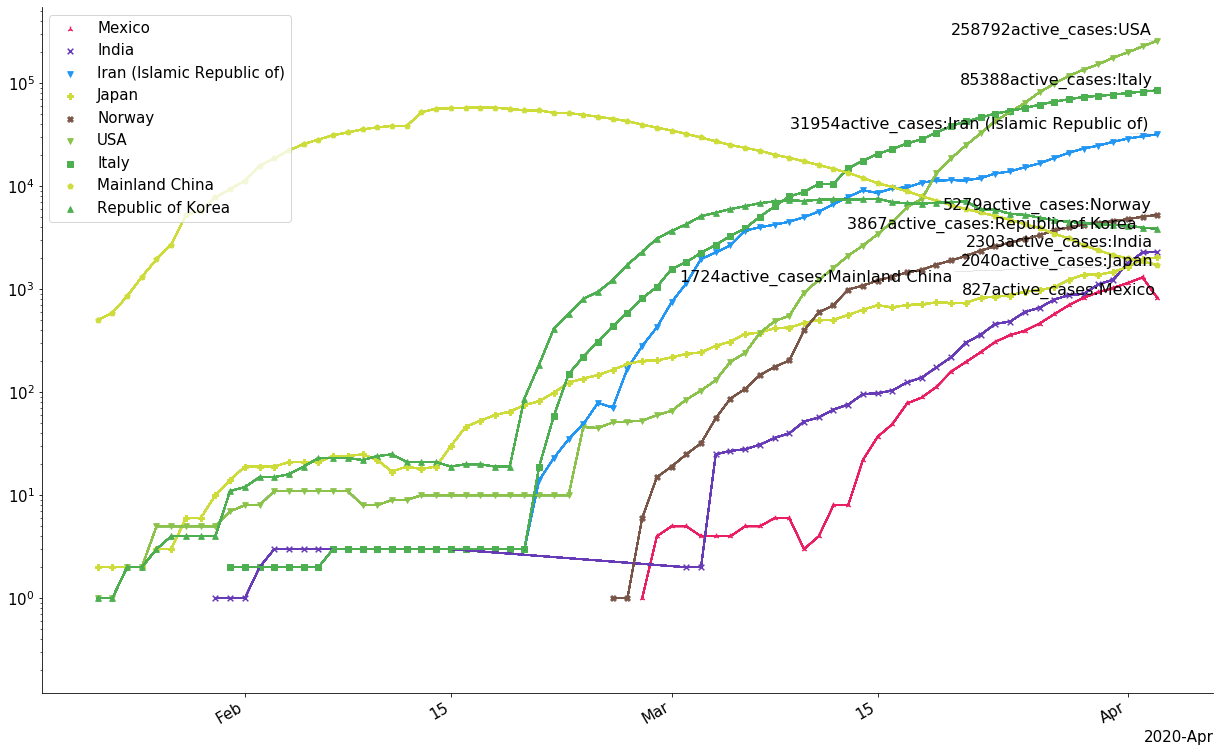

1510cases:Mexico
2567cases:India
53183cases:Iran (Islamic Republic of)
2617cases:Japan
5370cases:Norway
275586cases:USA
119827cases:Italy
81623cases:Mainland China
10062cases:Republic of Korea


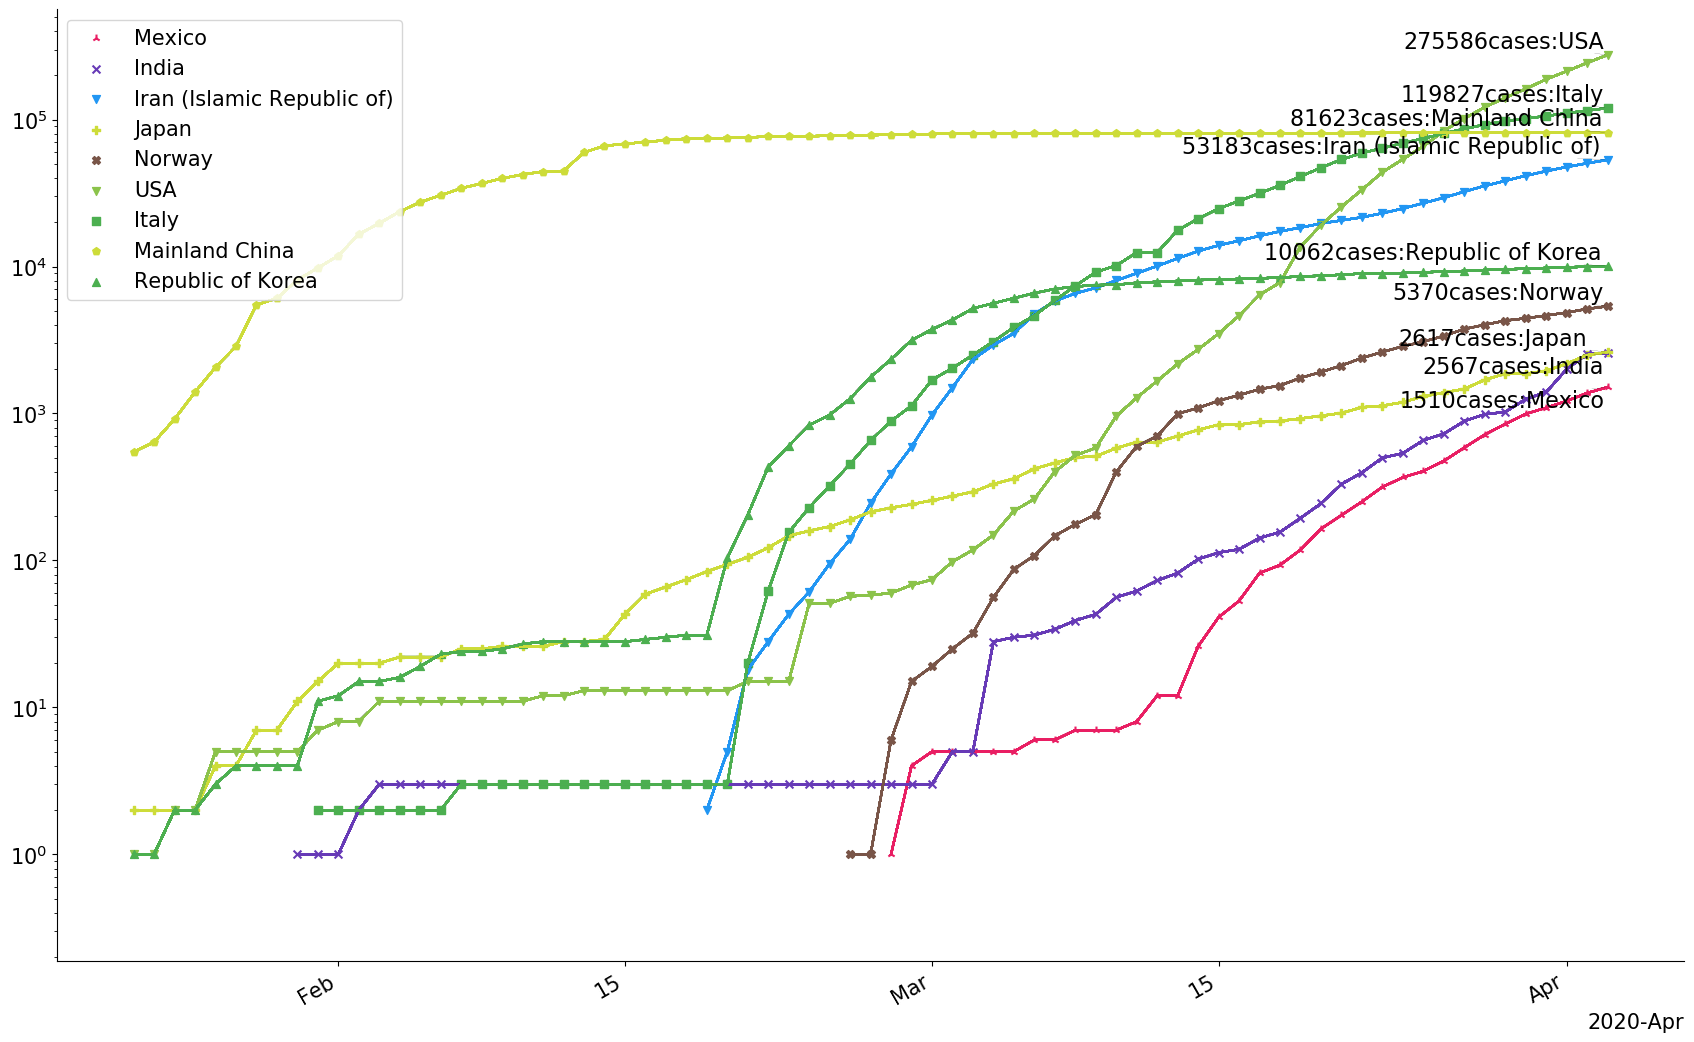

50deaths:Mexico
72deaths:India
3294deaths:Iran (Islamic Republic of)
63deaths:Japan
59deaths:Norway
7087deaths:USA
14681deaths:Italy
3322deaths:Mainland China
174deaths:Republic of Korea


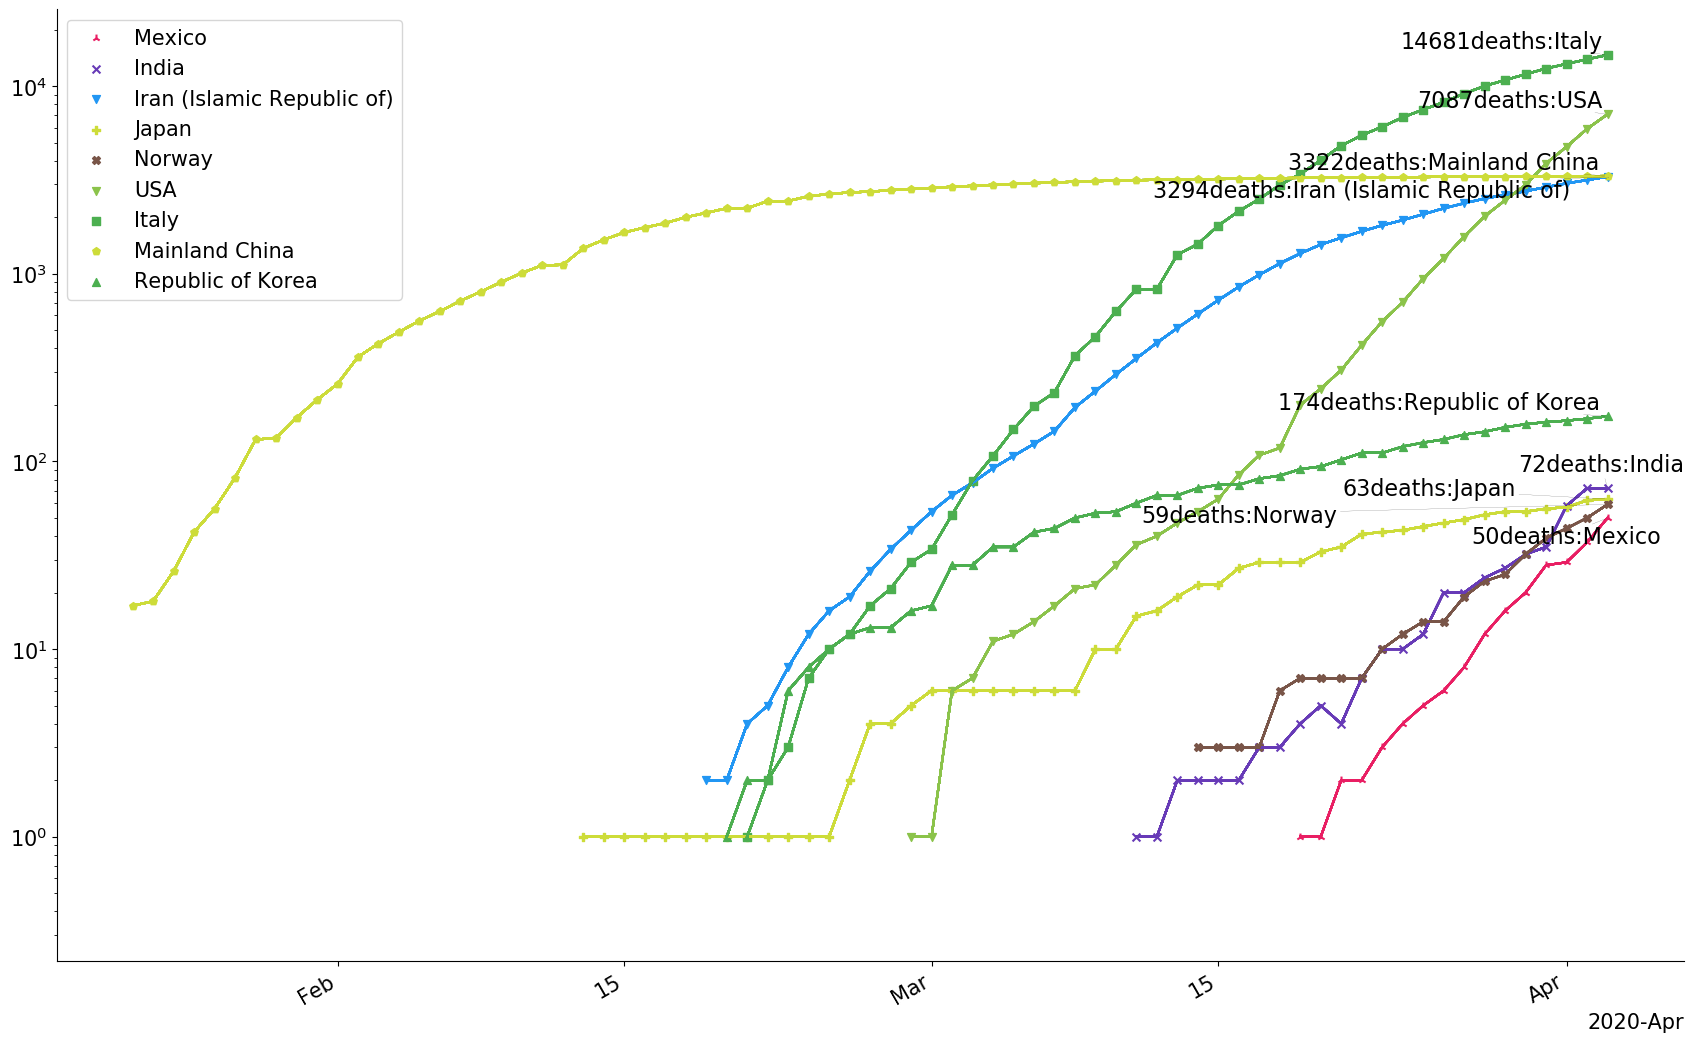

633recovered:Mexico
192recovered:India
17935recovered:Iran (Islamic Republic of)
514recovered:Japan
32recovered:Norway
9707recovered:USA
19758recovered:Italy
76577recovered:Mainland China
6021recovered:Republic of Korea


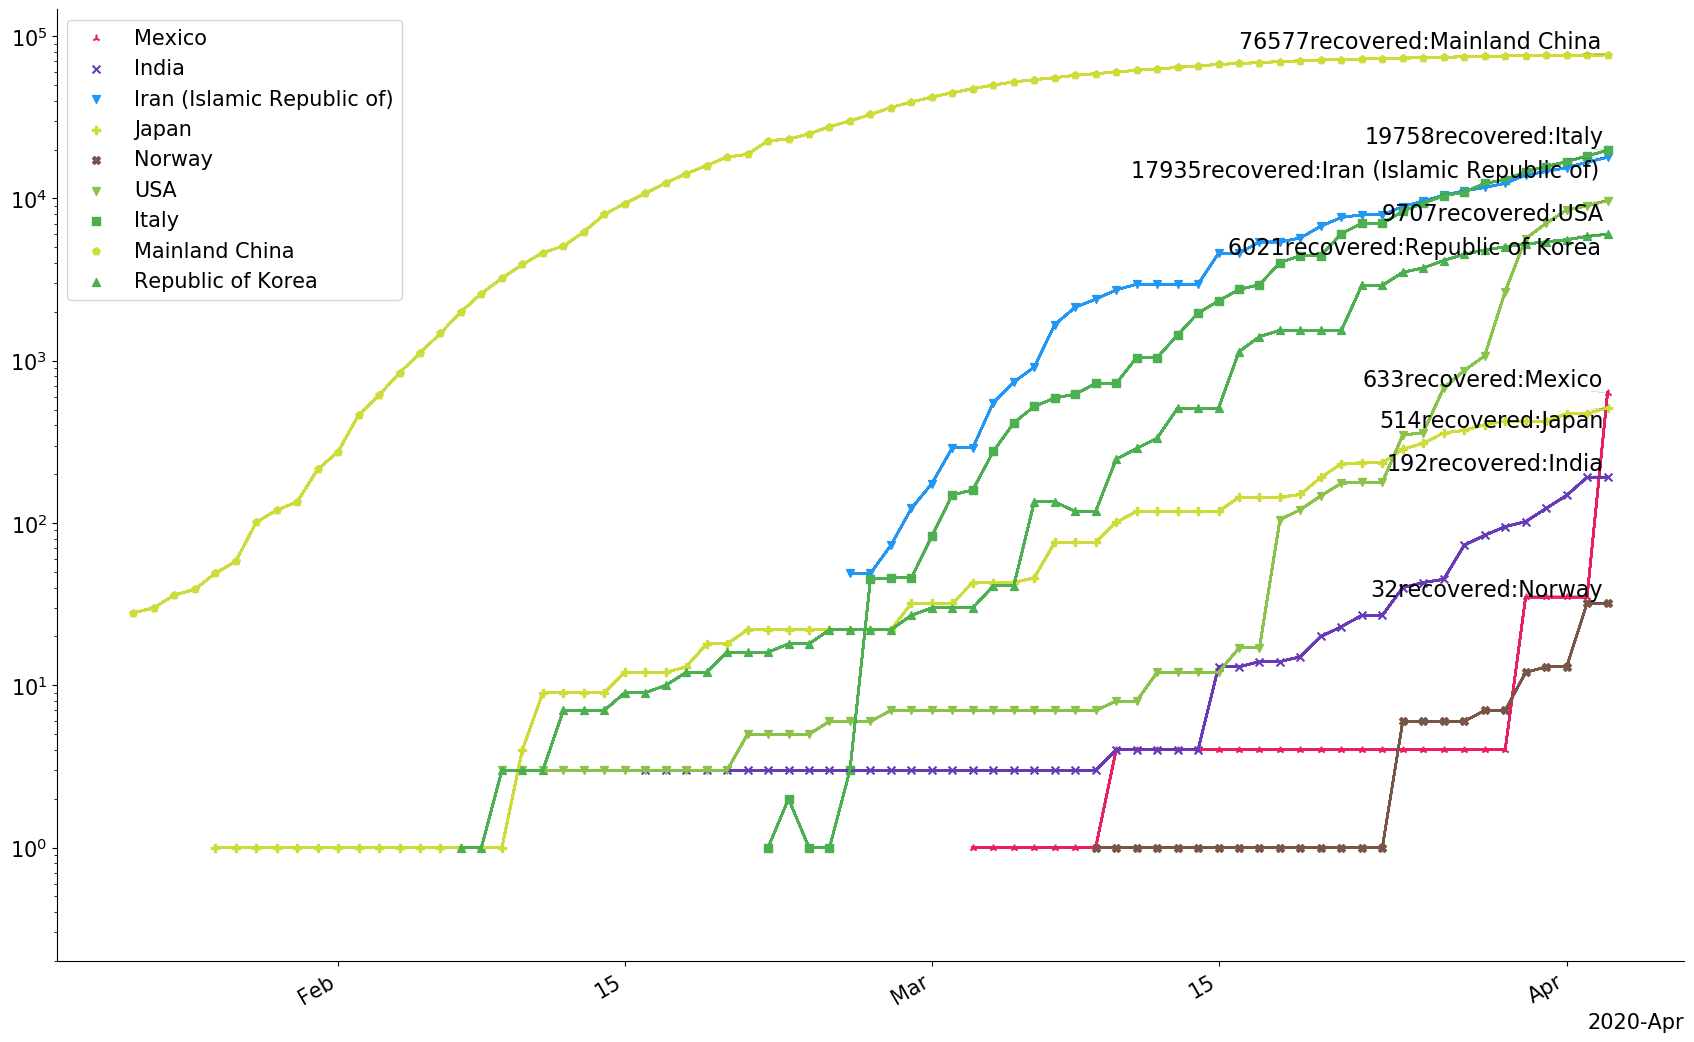

132new_cases:Mexico
24new_cases:India
2715new_cases:Iran (Islamic Republic of)
122new_cases:Japan
223new_cases:Norway
32133new_cases:USA
4585new_cases:Italy
34new_cases:Mainland China
86new_cases:Republic of Korea


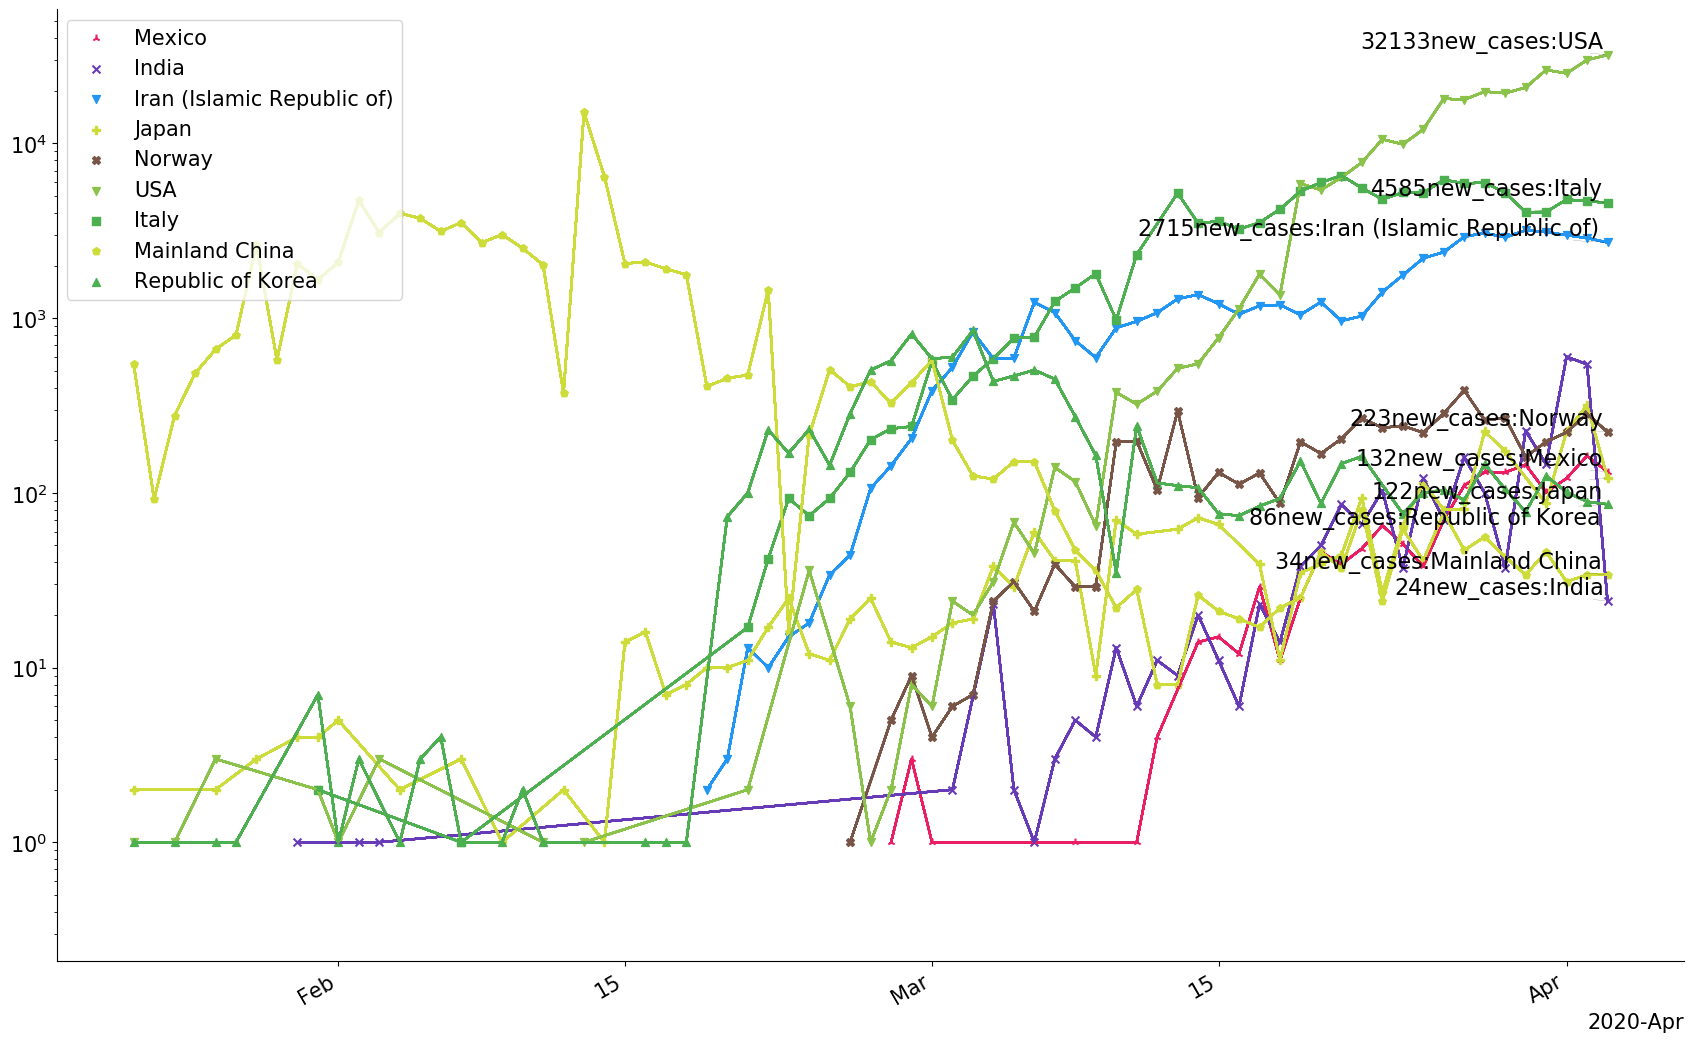

13new_deaths:Mexico
14new_deaths:India
134new_deaths:Iran (Islamic Republic of)
1new_deaths:Japan
9new_deaths:Norway
1161new_deaths:USA
766new_deaths:Italy
4new_deaths:Mainland China
5new_deaths:Republic of Korea


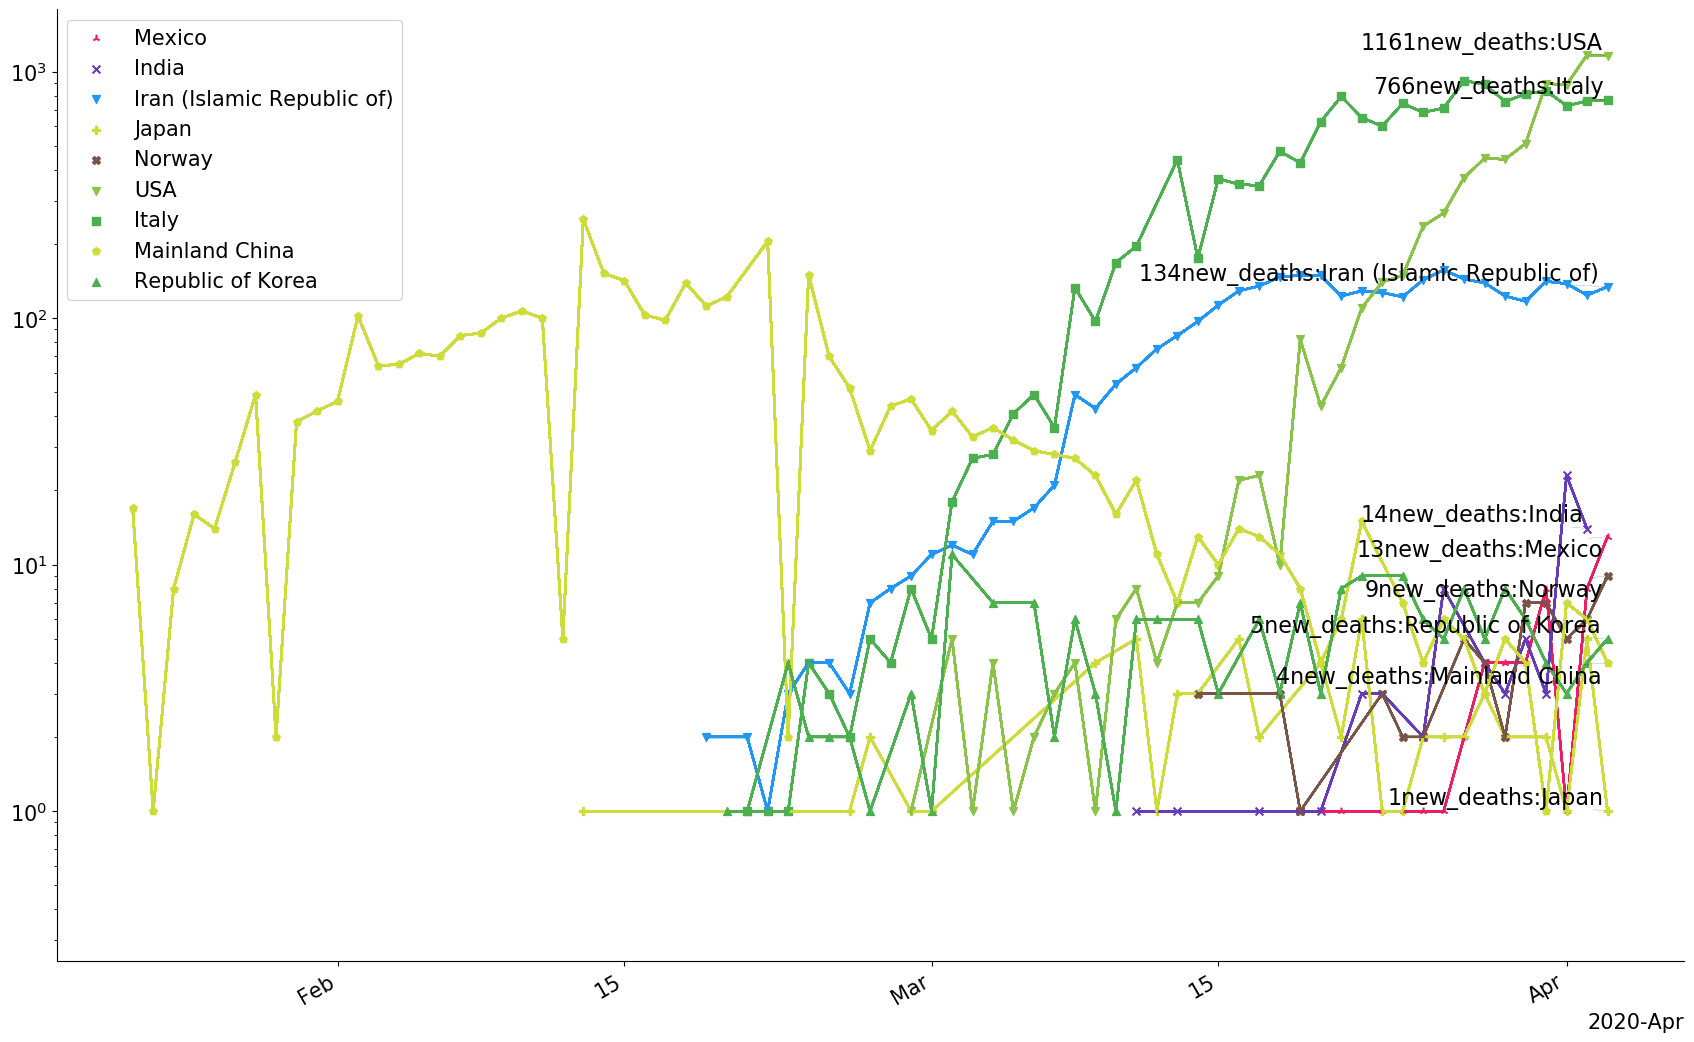

598new_recovered:Mexico
1new_recovered:India
1224new_recovered:Iran (Islamic Republic of)
42new_recovered:Japan
19new_recovered:Norway
706new_recovered:USA
1480new_recovered:Italy
169new_recovered:Mainland China
193new_recovered:Republic of Korea


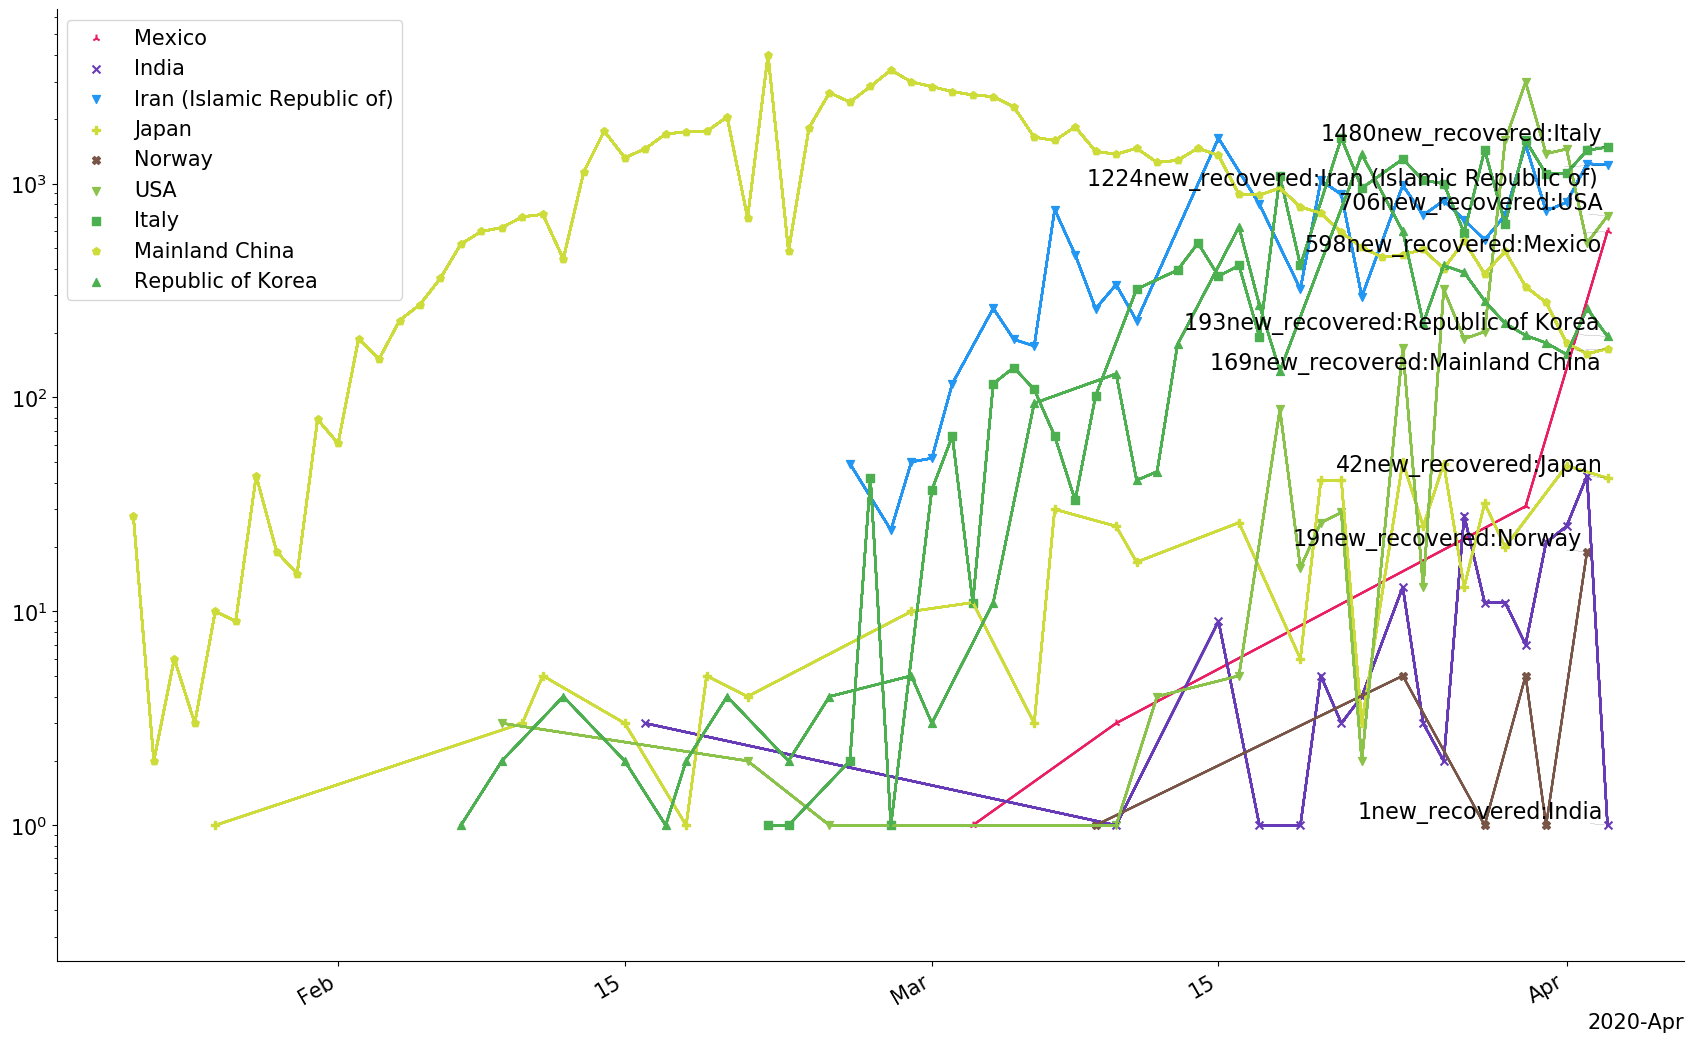

1.2per100k:Mexico
0.2per100k:India
63.3per100k:Iran (Islamic Republic of)
2.1per100k:Japan
99.1per100k:Norway
83.3per100k:USA
198.2per100k:Italy
5.7per100k:Mainland China
19.6per100k:Republic of Korea


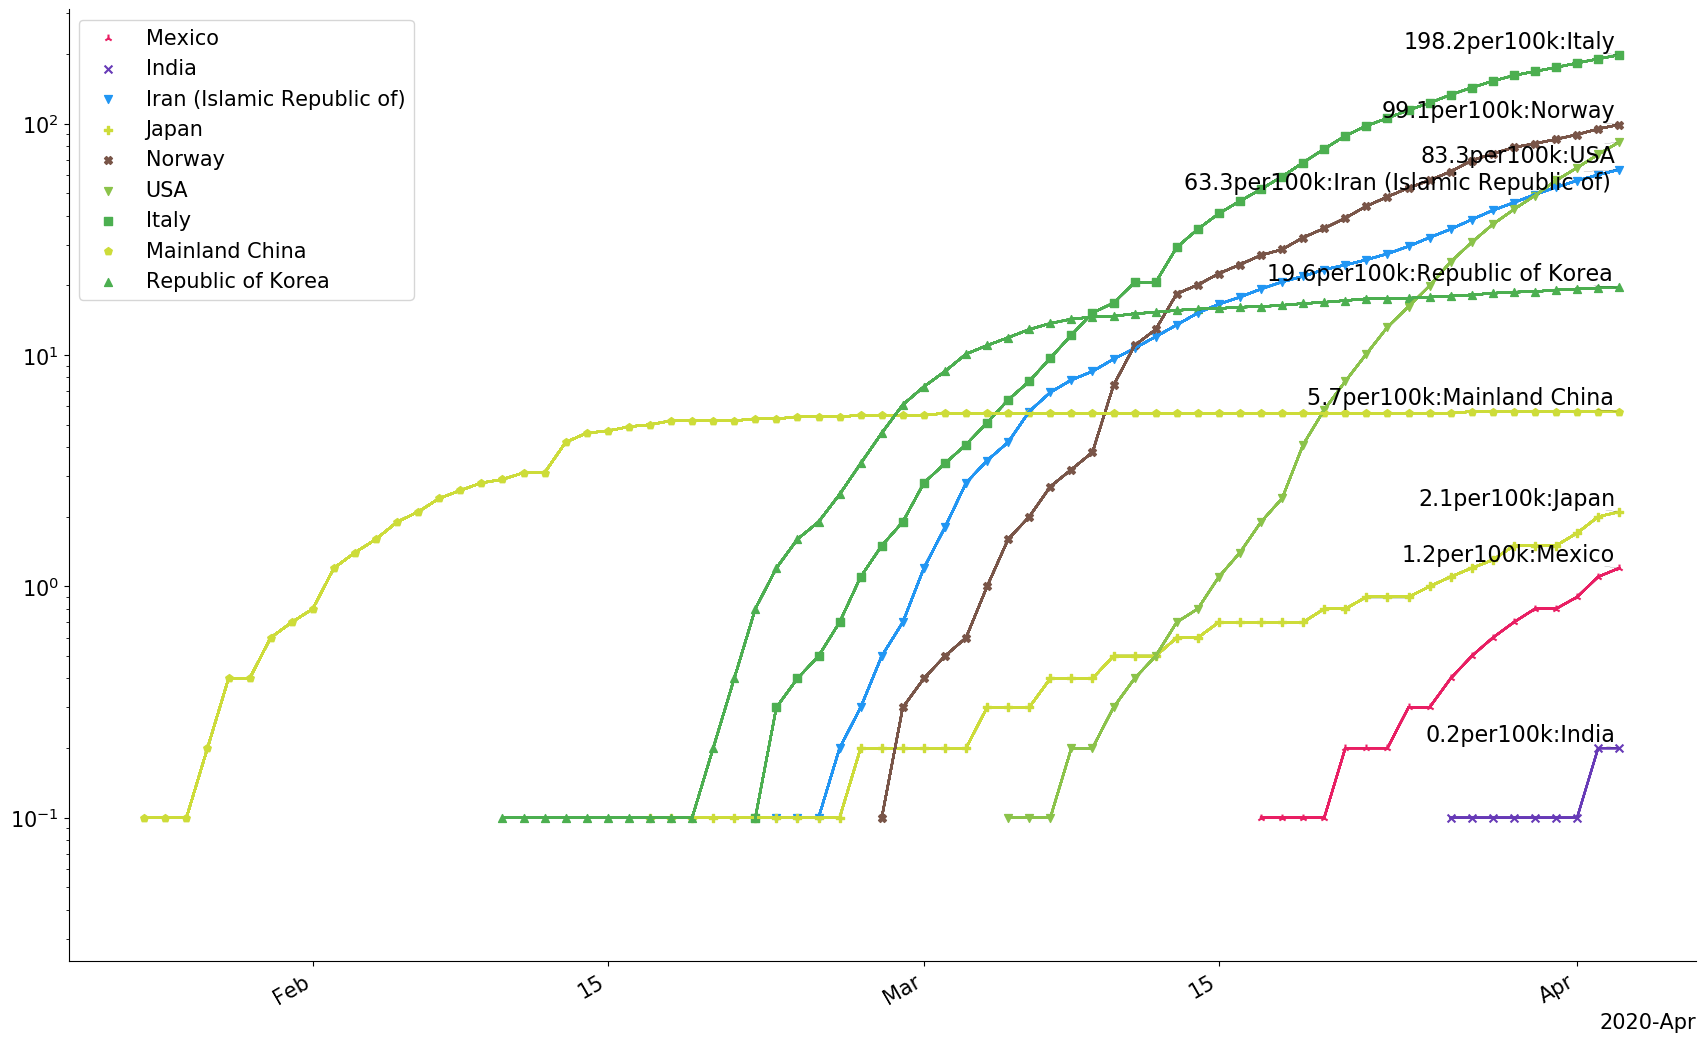

0.1newper100k:Mexico
3.2newper100k:Iran (Islamic Republic of)
0.1newper100k:Japan
4.1newper100k:Norway
9.7newper100k:USA
7.6newper100k:Italy
0.1newper100k:Mainland China
0.2newper100k:Republic of Korea


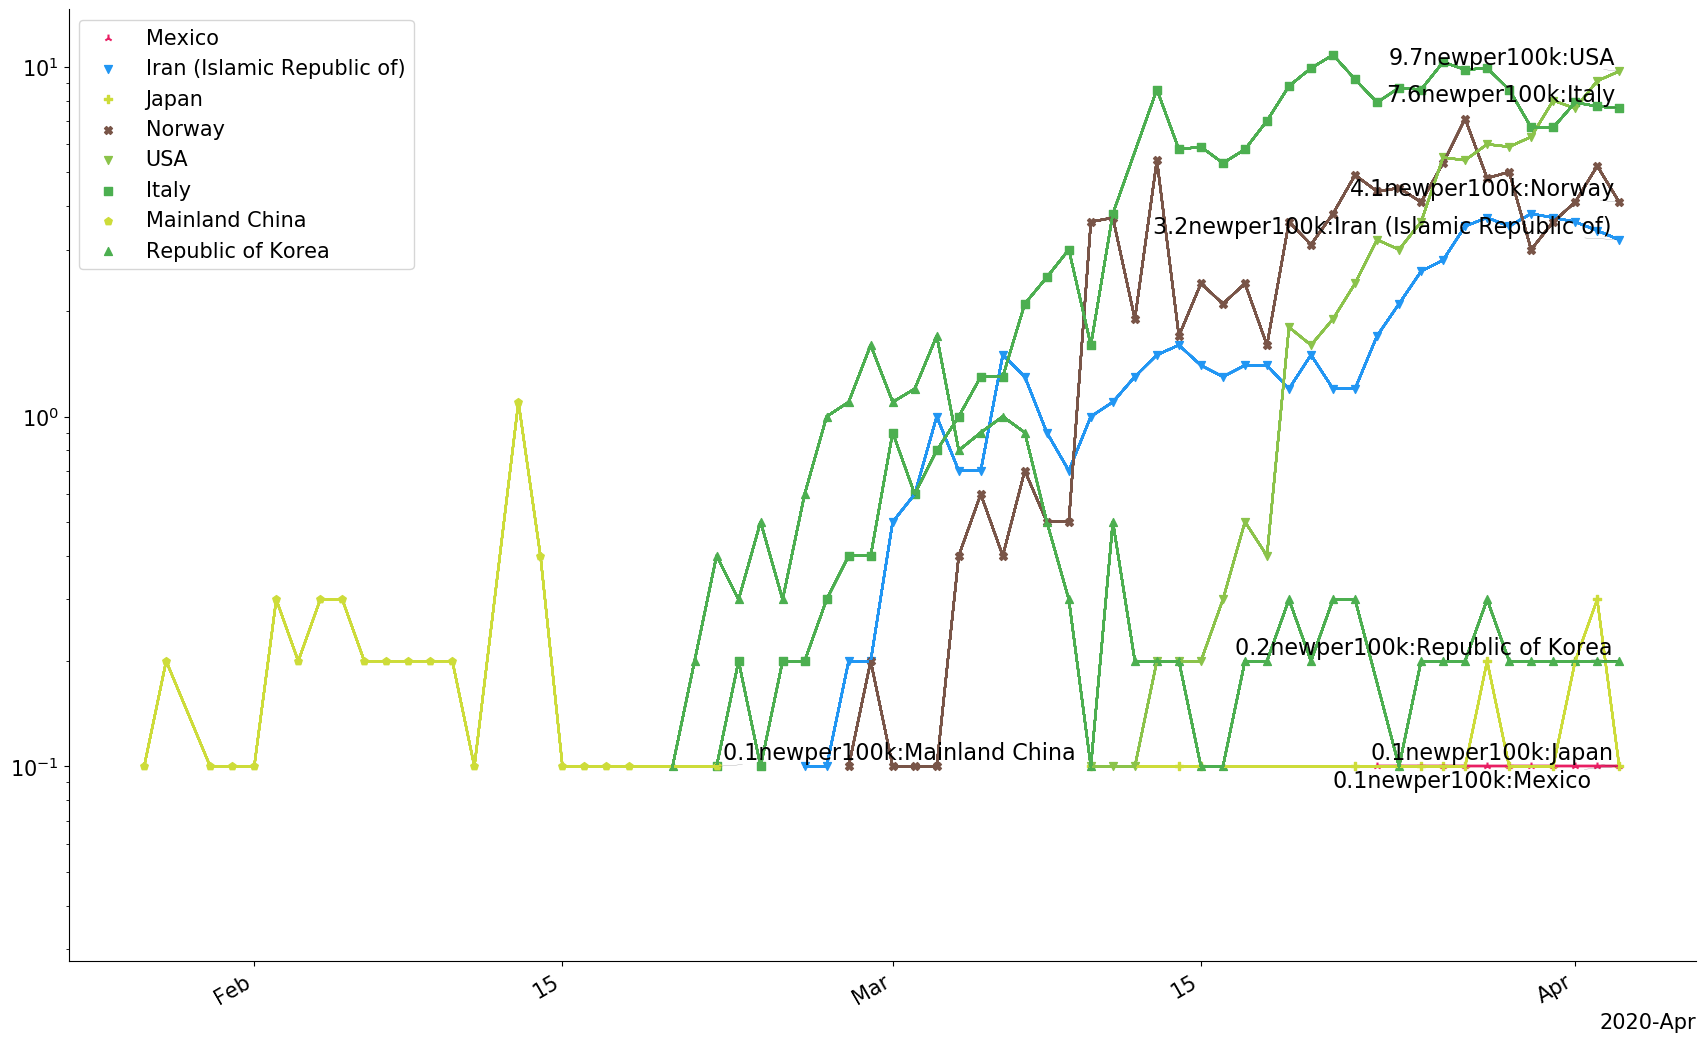

0.6activeper100k:Mexico
0.2activeper100k:India
38.0activeper100k:Iran (Islamic Republic of)
1.6activeper100k:Japan
97.4activeper100k:Norway
78.2activeper100k:USA
141.2activeper100k:Italy
0.1activeper100k:Mainland China
7.5activeper100k:Republic of Korea


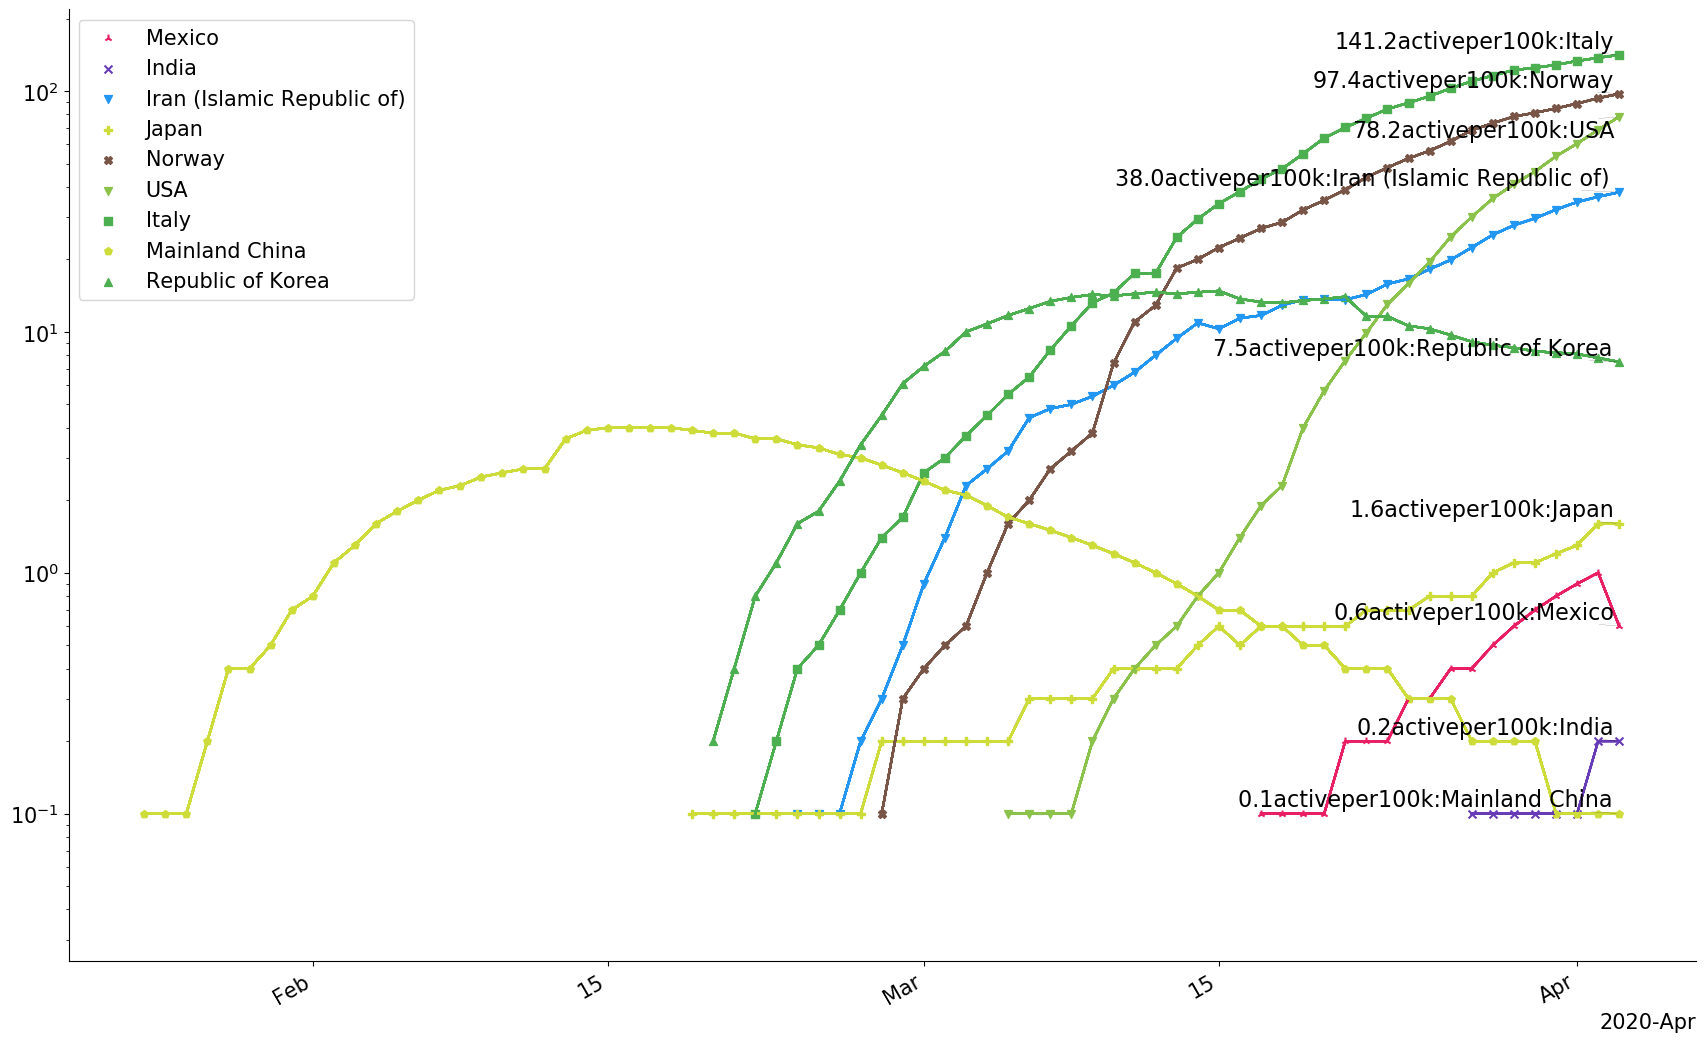

In [6]:
# "cases", "new_cases", "deaths", "new_deaths", "recovered", "new_recovered", "active_cases", "per100k", "newper100k", "activeper100k"

y_str     = [["active_cases"], ["cases"], ["deaths"], ["recovered"], ["new_cases"], ["new_deaths"], ["new_recovered"], ["per100k"], ["newper100k"], ["activeper100k"]];
countries = ['Mexico','India','Iran (Islamic Republic of)','Japan','Norway','USA','Italy','Mainland China','Republic of Korea'];
legPos    = "upper left";
logScale  = True;

for ystr in y_str:
    covid19plot(ystr, countries, legPos, logScale)

50deaths:Mexico
633recovered:Mexico
827active_cases:Mexico


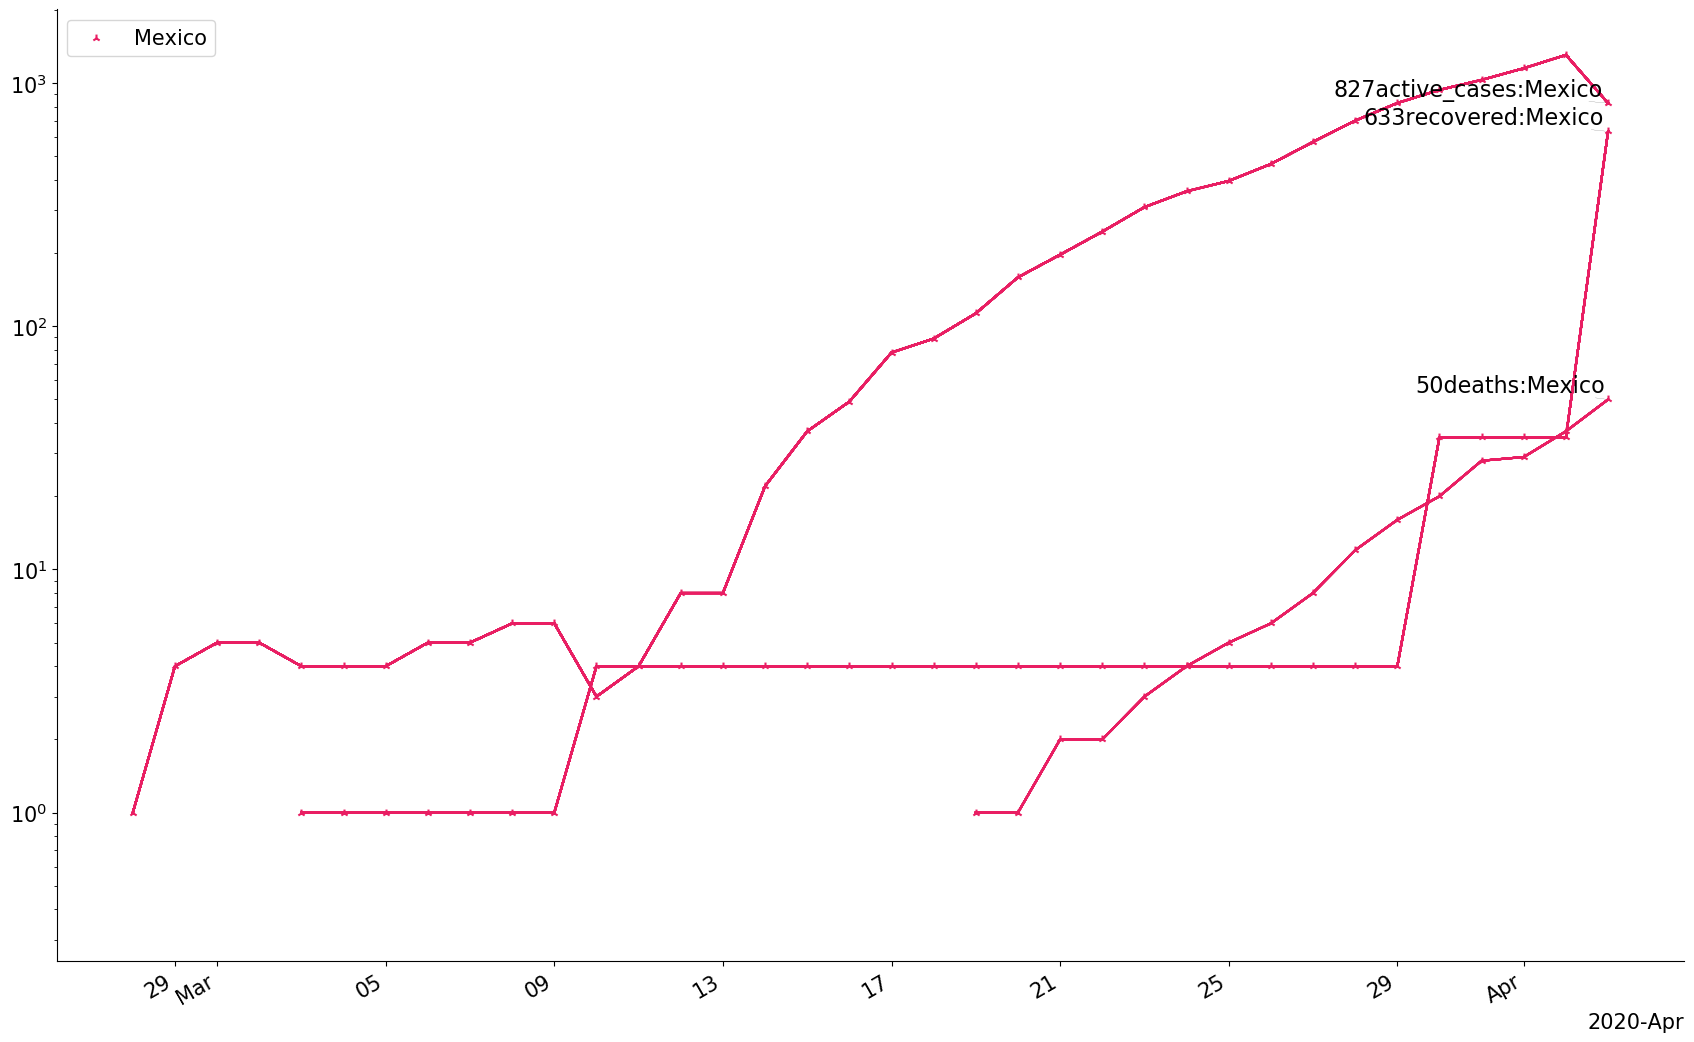

In [7]:
y_str     = ["deaths", "recovered", "active_cases"];
countries = ['Mexico'];
legPos    = "upper left";
logScale  = True;

covid19plot(y_str, countries, legPos, logScale)

13new_deaths:Mexico
598new_recovered:Mexico
132new_cases:Mexico


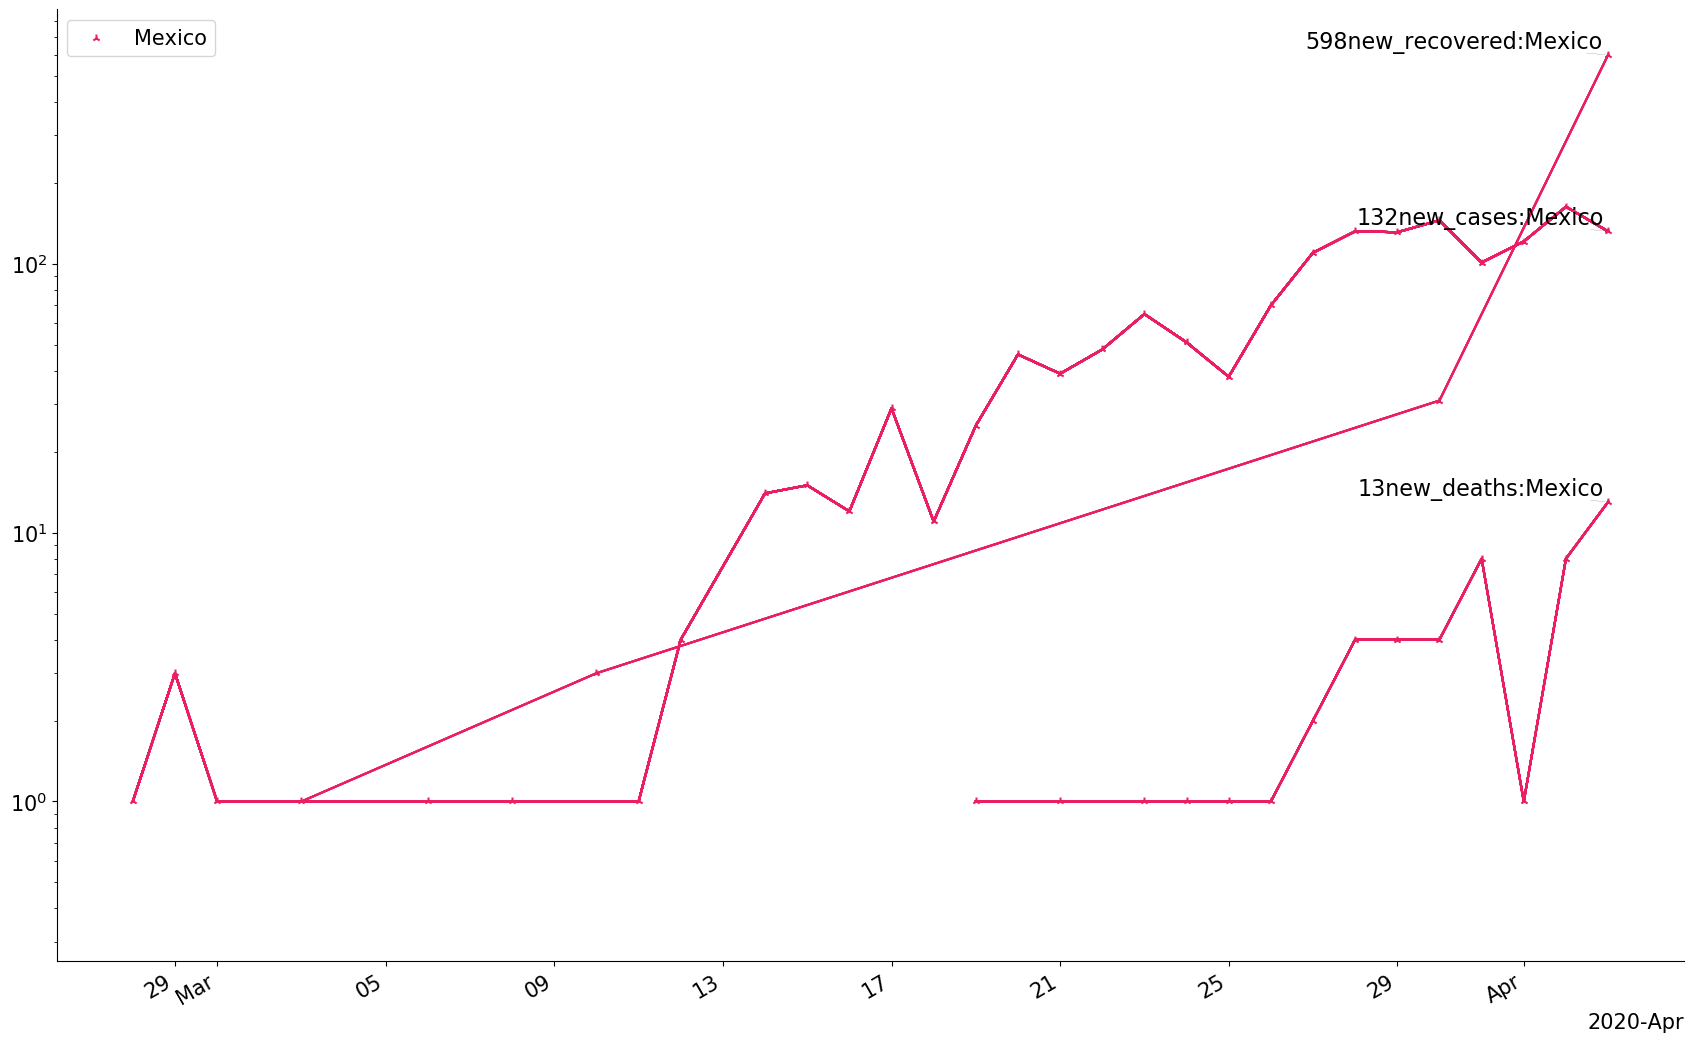

In [8]:
y_str     = ["new_deaths", "new_recovered", "new_cases"];
countries = ['Mexico'];
legPos    = "upper left";
logScale  = True;

covid19plot(y_str, countries, legPos, logScale)

---